Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Libraries for today's project
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Sprint Challenge Practice

- Can I import a CSV file into a DataFrame?
- Can I create a scatter plot?
- Can I split a DataFrame into a target vector and feature matrix?
- Can I split a dataset into a training set and a test set?
- Can I establish the baseline mean absolute error for a regression problem?
- Can I combine transformers with a predictor using a pipeline?
- Can I build a linear regresion model and a ridge regression model?
- Can I evaluate a model using common metrics like mean absolute error, root mean squared error, and R^2?
- If given a feature matrix, can I use my model to create a list of predictions?
- Can I create a horizontal bar chart with the coefficients from a linear model?

# Part 2: Pipelines and Plotting

Let's revise our work from yesterday.

# Part 3: Logistic Regression

# I. Wrangle Data

In [ ]:
def wrangle(filepath):
  df = pd.read_csv(filepath, index_col='PassengerId')
  df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
  df['Pclass'] = df['Pclass'].astype('object')
  return df

df = wrangle(DATA_PATH+'titanic/train.csv')
X_test = wrangle(DATA_PATH+'titanic/test.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


## II. Split Data

In [ ]:
# Split Target Vector from our Feature Matrix
target= 'Survived'

y=df[target]
X=df.drop(columns=target)

Since there's no time series component, we should do a randomized train-validation split.

In [ ]:
# Split our data into a TRAINING set and a VALIDATION set
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=.02, random_state=42)

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
887,2,male,27.0,0,0,13.0000,S
111,1,male,47.0,0,0,52.0000,S
295,3,male,24.0,0,0,7.8958,S
448,1,male,34.0,0,0,26.5500,S
193,3,female,19.0,1,0,7.8542,S


## III. Establish our baseline

- This is a **classification problem**, so we look at the **majority class** to calculate baseline **accuracy score**.

In [ ]:
y_train.value_counts(normalize=True)

0    0.619702
1    0.380298
Name: Survived, dtype: float64

In [ ]:
print('Baseline Accuracy Score:',y_train.value_counts(normalize=True).max())

Baseline Accuracy Score: 0.6197021764032073


## IV. Build Model

- Why would regular linear regression not work here?

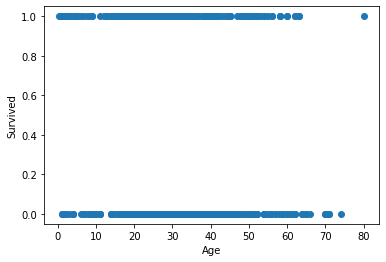

In [ ]:
plt.scatter(X_train['Age'],y_train)
plt.xlabel('Age')
plt.ylabel('Survived');

What we need for our model pipeline:

- `OneHotEncoder`
- `SimpleImputer`
- `LogisticRegression`

In [ ]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True), # Encode categorical values
    SimpleImputer(strategy='mean'), # Fill Nan values with column mean 
    StandardScaler(), # Re-scale all features (mean = 0, std =1)
    LogisticRegression()
)

model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Pclass', 'Sex', 'Embarked'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
    

## V. Check Metrics

In [ ]:
print('Training Accuracy:',model.score(X_train,y_train))

Training Accuracy: 0.8029782359679267


In [ ]:
model.score(X_val,y_val)

0.8888888888888888

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_test.shape

(418, 7)

In [ ]:
len(y_pred)

418

In [ ]:
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
y_preda = model.predict_proba(X_test)

In [ ]:
y_preda

NameError: ignored